# X (Twitter) Sentiment Analyis for Top Airlines in the USA

**Authors:** 

1. Joseph Kinuthia
2. Emily Owiti
3. James Mungai
4. Paul Muriithi
5. Raphael Kariuki
6. Sylvia Muchiri

# 1.0 Overview

In this project, we focus on leveraging Natural Language Processing (NLP) techniques to analyze sentiments expressed in a Twitter dataset, specifically within the airline industry domain. The primary objectives include sentiment analysis, the construction of a precise tweet classification model, and the development of a chatbot capable of responding to customer feedback and directing queries to the appropriate resolution teams. By accomplishing these goals, we will create solutions that enable airline companies to extract valuable insights from social media data which will play a big role in enhancing their customer service, improving their service offering and empowering these organizations to make data-driven decisions.

# 1.1 Business Understanding

Our dataset includes data for the top 5 airline companies in the USA and these are our primary stakeholders for the project. The key players are United Airlines, US Airways, American Airlines, Delta Airlines and Southwest Airlines.

Below we discuss the general trends and factors that are common in the global airline industry.

The global airline industry is a vital sector that provides air transport services for passengers and cargo. It plays a crucial role in connecting people, businesses, and regions across the world. The industry comprises a diverse range of airlines, including full-service carriers, low-cost carriers (LCCs), regional airlines, and charter airlines. Major players are often categorized into international, national, and regional carriers, each serving specific markets.

### Global airline industry trends:

The trends below were useful in developing our understanding and hence optimal analysis our dataset.

1. Digital transformation and technology adoption:
While late adopters, airlines are increasingly leveraging technology to enhance operational efficiency, customer experiences, and overall service quality. This includes implementing mobile apps, self-service kiosks, AI-powered chatbots, and data analytics for personalized marketing and improved decision-making.

2. Sustainable and environmentally friendly practices:
Environmental sustainability has become a significant focus within the industry. Airlines are investing in more fuel-efficient aircraft, exploring biofuels, and implementing eco-friendly practices to reduce carbon emissions and mitigate their environmental impact.

3. Demand for personalized travel experiences:
Travelers now seek personalized experiences, leading to a shift in airline strategies. Airlines are customizing services, offering ancillary products, and tailoring loyalty programs to meet individual preferences and needs.

4. Partnerships and alliances:
Collaborations, partnerships, and alliances among airlines have become prevalent. These agreements help airlines expand their networks, improve cost-efficiency, and offer travelers more seamless travel options.

5. Health and safety measures post-pandemic:
The COVID-19 pandemic has significantly impacted the industry. Airlines are implementing stringent health and safety protocols to regain traveler confidence. Measures include enhanced cleaning procedures, health screenings, and contactless processes.

### Airline industry profit margins

The net profit margin for airlines is highly influenced by market conditions, fuel prices, operational efficiency, competition, and economic trends. On average, net profit margins for airlines typically range from 2% to 5%. However, it's important to note that individual airline net profit margins may fluctuate, and some airlines may experience periods of losses due to various factors affecting the industry. Airlines with a positive brand tend to have lower customer churn and in return higher pricing and higher revenues.

# 1.2 Problem Statement
The advent of social media has generated an abundance of data, presenting both opportunities and challenges for organizations. This vast pool of data offers unparalleled insights into customer perceptions, preferences, and feedback. However, many organizations are yet to develop frameworks and strategies to effectively analyze and interpret such data. Insights from this data holds the potential to benefit various domains, including business operations, marketing strategies, public opinion analysis, and more.

Our stakeholders (top American airline companies) have requested us to analyze social media raw data and showcase the customer sentiment as either positive, neutral or negative while identifying the top drivers for these sentiments.

Our dataset is sourced from Twitter, capturing a wide array of tweets, and our primary focus is analyzing and visualizing drivers for key & top public & customer sentiment. We aim to address critical questions and challenges faced by airlines, such as understanding passenger sentiments from unstructured data and predicting engagement metrics. By doing so, we strive to provide airlines with the tools and knowledge needed to enhance customer experiences, optimize operations, and make data-driven decisions in an ever-evolving and competitive industry.


# 1.3 Project Objectives

### 1.3.1 Main Objective
The primary goal of the project is sentiment analysis to analyze raw tweets to extract the public sentiment as well as development of a chatbot.




### 1.3.2 Specific Objectives
1. To analyze the data & derive the public's sentiment (positive, neutral or negative) for our client
2. To build a model that can classify raw tweets into the three sentiment classes for future use
3. To visualize the top drivers for each sentiment category to help management target service delivery improvement
4. To create a chatbot to monitor customer feedback on X that provides realtime responses to customers

# 1.4 Research Questions

The project will be answer the below research questions:
1. What are the predominant sentiments expressed by passengers on X regarding major U.S. airlines?
2. What are the most common reasons for negative sentiments among airline passengers, as expressed in their tweets?
3. How does the sentiment compare between the various airlines in our dataset (highest positive, negative, neutral)?

# 1.5 Metrics of Success
Evaluate the performance of each sentiment analysis model using appropriate metrics such as:

* Accuracy: Measure the overall correctness of the model's predictions in classifying tweets into sentiment categories (positive, negative, or neutral). We aim to achieve an accuracy score within the range of 80% to 90% to ensure a high degree of correctness in our predictions.

* Precision: Assess the model's ability to correctly classify positive sentiments among the predicted positive cases.

* Recall: Evaluate the model's ability to correctly identify positive sentiments among all the actual positive cases.

* F1 Score: Examine the balance between precision and recall, considering both false positives and false negatives. A high F1 score indicates a model's ability to capture positive sentiments while avoiding excessive false positives or false negatives.

* Cross-validation: Utilize cross-validation scores (e.g., cross-validated accuracy, precision, recall, or F1 score) to assess how well each model generalizes to unseen data, ensuring robust performance in real-world applications. 



# 1.6 Project Approach

1. Exploratory data analysis & data cleaning (including categorical variable encoding, feature engineering)
2. Data preprocessing for NLP (preparing text for sentiment scoring)
3. Data labelling & determining labelling accuracy
3. Sentiment analysis
4. Visualization of sentiment analysis outcomes
5. Prediction model building & validation
6. Chatbot development
7. Prediction model & chatbot deployment

# 2.0 Data Understanding

Our dataset was publicly sourced from crowdflower website and is made up of Twitter users' tweets and retweets.
The dataset has 14,640 rows and 20 columns.
This Twitter data was collected from February 2015 and contributors were engaged in classifying tweets into categories of positive, negative, and neutral sentiments. Additionally, contributors were tasked with categorizing the reasons behind negative sentiments, such as "late flight" or "rude service."

This dataset serves as the foundation for our analysis, enabling us to gain insights into passenger & general public sentiments, engagement patterns, and other trends within the US airline industry.

[Link to the Data Source](https://data.world/crowdflower/airline-twitter-sentiment/) 

In [1]:
## Step 1: Importing Necessary Libraries
# data manipulation and analysis
import pandas as pd
import numpy as np
from collections import defaultdict

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural language processing (NLP)
import html
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Machine learning
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score,\
    confusion_matrix, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Deep learning imports 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# Set the style for data visualization
sns.set(style='darkgrid')

# NLP packages downloads.
nltk.download('stopwords')
nltk.download('wordnet')

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing os and pickle
import os
import pickle

c:\Users\kinut\anaconda3\envs\learn-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kinut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kinut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading data into a dataframe
data = pd.read_csv("Airline-Sentiment-2-w-AA.csv", encoding='latin 1')

# Displaying the first 5 rows of the data
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [4]:
data.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


***
The dataset contains 14,640 entries and 20 columns. Here's a brief description of the dataset's contents and the significance of each column:

- `_unit_id`: A unique identifier for each data unit.
- `_golden`: A boolean value indicating whether the entry is a golden unit in the dataset.
- `_unit_state`: The state of the unit (e.g., golden).
- `_trusted_judgments`: The number of trusted judgments for the entry.
- `_last_judgment_at`: Timestamp of the last judgment for the entry.
- `airline_sentiment`: The target variable, which represents the sentiment of the airline tweet (positive, negative, or neutral).
- `airline_sentiment:confidence`: The confidence level associated with the airline sentiment.
- `negativereason`: The reason for negative sentiment in the tweet.
- `negativereason:confidence`: The confidence level associated with the negative sentiment reason.
- `airline`: The airline associated with the tweet.
- `airline_sentiment_gold`: Additional information about airline sentiment (gold standard).
- `name`: The name of the user who posted the tweet.
- `negativereason_gold`: Additional information about the negative sentiment reason (gold standard).
- `retweet_count`: The number of retweets for the tweet.
- `text`: The text content of the tweet.
- `tweet_coord`: Coordinates of the tweet (if available).
- `tweet_created`: Timestamp of when the tweet was created.
- `tweet_id`: The unique identifier of the tweet.
- `tweet_location`: The location associated with the tweet (if provided).
- `user_timezone`: The timezone of the user who posted the tweet.

In this dataset, the `airline_sentiment` column is the target variable, which represents the sentiment of the airline tweet that we may want to predict or analyze. The other columns, such as `text`, `airline`, and `retweet_count`, can be used as features for sentiment analysis, engagement prediction, and language/location analysis.
***


In [5]:
# Display the 'text' column
text_column = data['text']
print(text_column)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


In [6]:
# Check distribution of airlines
data['airline'].value_counts()


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

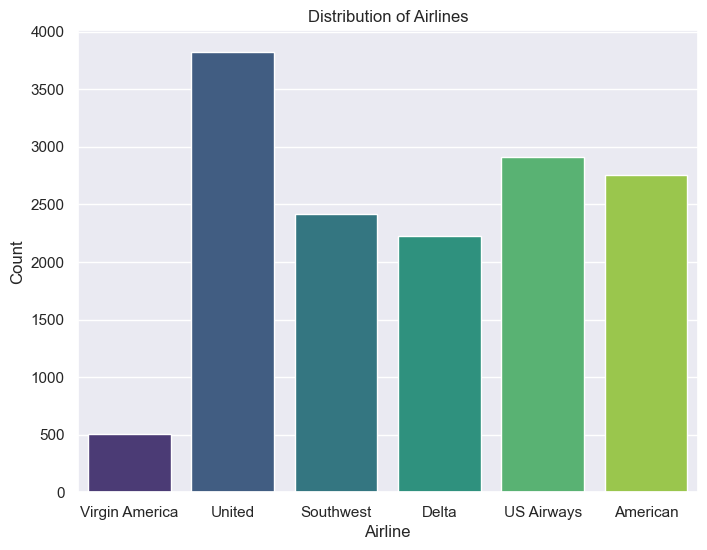

In [7]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(data=data, x='airline', palette='viridis')

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airlines')

# Show the plot
plt.show()

**text:** The text content of the tweet is one of the most critical features for sentiment analysis. It contains the actual user-generated content that you can analyze for sentiment.

**airline:** The airline associated with the tweet is essential because sentiment can vary depending on the airline. It's a categorical feature that can be one-hot encoded for model training.

**negativereason:** If available, the reason for negative sentiment can provide valuable information for understanding why users are expressing negative sentiment towards an airline.

**user_timezone:** The timezone of the user who posted the tweet might be relevant because sentiment can vary by geographic region and time of day.

**retweet_count:** The number of retweets can be an indicator of the tweet's popularity or how strongly the sentiment is resonating with others. It can serve as a feature to capture engagement.

**tweet_location:** The location associated with the tweet might provide insights into regional sentiment variations.

**tweet_created:** The timestamp of when the tweet was created can be used for time-based analysis, such as sentiment trends over time.

## 3.0 Data Preprocessing 

In [8]:
missing_vals = data.isnull().sum()
missing_vals

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
# Selection of relevant features
selected_columns = ["_trusted_judgments", "_last_judgment_at",
                    "airline_sentiment", "airline_sentiment:confidence", "negativereason",
                    "negativereason:confidence", "airline", "retweet_count", "text", "tweet_created",
                    "tweet_location", "user_timezone"]

In [10]:
data = data[selected_columns]
data.head()

,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [11]:
data.isna().sum()

_trusted_judgments                 0
_last_judgment_at                 56
airline_sentiment                  0
airline_sentiment:confidence       0
negativereason                  5462
negativereason:confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

### 3.1.1 Imputing Missing Values

    **_last_judgment_at:**
Since _last_judgment_at is a timestamp, we impute missing values with the mode (most frequent) timestamp to maintain the distribution of values. 

In [12]:
data['_last_judgment_at'].fillna(data['_last_judgment_at'].mode()[0], inplace=True)


    **negativereason and negativereason:confidence:**
These columns are related to the reason for negative sentiment. We impute missing values with a placeholder, "Not specified" to indicate that the reason was not provided:

In [13]:
data['negativereason'].fillna('Not specified', inplace=True)
data['negativereason:confidence'].fillna('Not specified', inplace=True)


    **tweet_location and user_timezone:**
These columns represent user-provided data and may be critical for the analysis. We can impute missing values with "Not Specific" or "Unknown" to indicate that the information was not provided:

In [14]:
data['tweet_location'].fillna('Not specified', inplace=True)
data['user_timezone'].fillna('Unknown', inplace=True)


In [15]:
data.isna().sum()

_trusted_judgments              0
_last_judgment_at               0
airline_sentiment               0
airline_sentiment:confidence    0
negativereason                  0
negativereason:confidence       0
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

### 3.1.2 Text Preprocessing 
NLP, a subset of Data Science, focuses on working with text data. Text data, abundant alongside numerical data, plays a crucial role in solving various business problems. However, before utilizing this data for analysis or predictions, it requires preprocessing.

Text preprocessing serves as the initial step in our NLP project and encompasses several key procedures:

* Eliminating punctuation marks such as periods, commas, exclamation points, parentheses, asterisks, percentage signs, and at symbols. ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

* Omitting URLs from the text.

* Removing common stop words (e.g., "the," "and," "is") that do not carry significant meaning.

* Converting all text to lowercase for consistency.

* Tokenization, breaking the text into individual words or tokens.


* Lemmatization, a more sophisticated technique that reduces words to their base or dictionary form, considering context and meaning.

These preprocessing steps help ensure that the text data is clean, structured, and ready for further analysis or modeling in NLP projects.

### 3.1.2.1 Remove Contractions

In [16]:
# A function to remove contractions from the text
def remove_contractions(text):
    contraction_mapping = {
        "you've": "you have",
        "didn't": "did not",
        "can't": "cannot",
        "it's": "it is",
        "I'm": "I am",
        "we're": "we are",
        "that's": "that is",
        "they're": "they are",
        "shouldn't": "should not",
        "isn't": "is not",
        "won't": "will not",
        "didn't": "did not",
        "doesn't": "does not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "wouldn't": "would not",
        "aren't": "are not",
        "couldn't": "could not",
        "mustn't": "must not",
    }

    # Replace contractions in the text
    for contraction, expanded_form in contraction_mapping.items():
        text = re.sub(contraction, expanded_form, text)

    return text

# Example usage:
data['cleaned_tweet'] = data['text'].apply(remove_contractions)
data['cleaned_tweet'].head(20)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you have added commercials...
2     @VirginAmerica I did not today... Must mean I ...
3     @VirginAmerica it is really aggressive to blas...
4     @VirginAmerica and it is a really big bad thin...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8     @virginamerica Well, I did notÛ_but NOW I DO!...
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I am flying your #...
14                               @VirginAmerica Thanks!
15        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica So excited for my first cross c...
17    @VirginAmerica  I flew from NYC to SFO las

### 3.1.2.2 Removing punctuations, urls, name tags, encoded characters and underscores 

In [17]:
# A function to clean tweets by removing name tags, 
# punctuations, links, encoded characters, and underscores
def clean_tweet(tweet):
    """Removes name tags, punctuations, links, encoded characters, and underscores."""
        
     # Lowercase the tweet text
    tweet = tweet.lower()
    
    # Defining a list of regex patterns and corresponding replacements
    
    patterns = [
        (r'@\w+', ''),             # Removing name tags
        (r'[^\w\s]', ''),          # Removing punctuations
        (r'http\S+', ''),          # Removing links (http/https)
        (r'[^\x00-\x7F]+', ''),    # Removing encoded characters
        (r'_', ''),                # Removing underscores
        (r'\d', ''),               # Removing numbers
    ]
    
    # Applying regex substitutions sequentially
    for pattern, replacement in patterns:
        tweet = re.sub(pattern, replacement, tweet)
    
    # Decoding HTML entities
    tweet = html.unescape(tweet)
    
    # Remove extra spaces and rejoin sentence
    tweet = ' '.join(tweet.split())
        
    # Returning the cleaned tweet
    return tweet

# Applying the cleaning function to the 'text' column and create a new 'cleaned_tweet' column
data['cleaned_tweet'] = data['cleaned_tweet'].apply(clean_tweet)

# Confirming the updated DataFrame
data['cleaned_tweet'].head(20)

0                                             what said
1     plus you have added commercials to the experie...
2     i did not today must mean i need to take anoth...
3     it is really aggressive to blast obnoxious ent...
4             and it is a really big bad thing about it
5     seriously would pay a flight for seats that di...
6     yes nearly every time i fly vx this ear worm w...
7     really missed a prime opportunity for men with...
8                          well i did notbut now i do d
9     it was amazing and arrived an hour early youre...
10    did you know that suicide is the second leadin...
11    i lt pretty graphics so much better than minim...
12    this is such a great deal already thinking abo...
13    i am flying your fabulous seductive skies agai...
14                                               thanks
15                         sfopdx schedule is still mia
16    so excited for my first cross country flight l...
17    i flew from nyc to sfo last week and could

### 3.1.2.3 Removing Emojis

In [18]:
def remove_emojis(text):
    # Define a regular expression pattern for emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric shapes
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-A
                               u"\U0001F900-\U0001F9FF"  # Supplemental Arrows-B
                               u"\U0001FA00-\U0001FA6F"  # Supplemental Symbols and Pictographs
                               u"\U0001FA70-\U0001FAFF"  # Emoji modifiers
                               u"\U0001F004-\U0001F0CF"  # Extended emoticons
                               u"\U0001F170-\U0001F251"  # Enclosed characters
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    # Use the sub() method to remove emojis from the text
    text_without_emojis = emoji_pattern.sub(r'', text)
    
    return text_without_emojis

data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_emojis)

### 3.1.2.4 Tokenization
In this step, the text is split into smaller units using word tokenization. It allows us to work with individual words as discrete units, making it easier to extract meaning and patterns from the text.

In [19]:
# Define a function to tokenize text using a regular expression pattern
def tokenize_with_regexp(text):
    
        # Define the regular expression pattern for tokenization
    pattern = r'\w+|\$[\d\.]+|\S+'
        
        # Create a RegexpTokenizer with the pattern
    tokenizer = RegexpTokenizer(pattern)
        
        # Tokenize the text and return the tokens
    tokens = tokenizer.tokenize(text)
        
    return tokens

#applying function to the column  
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x: tokenize_with_regexp(x)) 
data['cleaned_tweet'].head(20)  


0                                          [what, said]
1     [plus, you, have, added, commercials, to, the,...
2     [i, did, not, today, must, mean, i, need, to, ...
3     [it, is, really, aggressive, to, blast, obnoxi...
4     [and, it, is, a, really, big, bad, thing, abou...
5     [seriously, would, pay, a, flight, for, seats,...
6     [yes, nearly, every, time, i, fly, vx, this, e...
7     [really, missed, a, prime, opportunity, for, m...
8                 [well, i, did, notbut, now, i, do, d]
9     [it, was, amazing, and, arrived, an, hour, ear...
10    [did, you, know, that, suicide, is, the, secon...
11    [i, lt, pretty, graphics, so, much, better, th...
12    [this, is, such, a, great, deal, already, thin...
13    [i, am, flying, your, fabulous, seductive, ski...
14                                             [thanks]
15                   [sfopdx, schedule, is, still, mia]
16    [so, excited, for, my, first, cross, country, ...
17    [i, flew, from, nyc, to, sfo, last, week, 

### 3.1.2.5 Stop Word Removal
The NLTK library provides a convenient way to access and utilize a list of stopwords for various natural language processing tasks in English. By removing stopwords like **[i, me, my, myself, we, our, ours, ourselves, etc]** from text data, we can focus on the more meaningful and context-rich words, which can improve the accuracy and efficiency of text analysis, such as text classification or sentiment analysis.


In [20]:
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text): 
    
    output= [i for i in text if i not in stopwords]
    
    return output

#applying the function
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x:remove_stopwords(x))
data['cleaned_tweet'].head(20)

0                                                [said]
1         [plus, added, commercials, experience, tacky]
2        [today, must, mean, need, take, another, trip]
3     [really, aggressive, blast, obnoxious, enterta...
4                             [really, big, bad, thing]
5     [seriously, would, pay, flight, seats, playing...
6     [yes, nearly, every, time, fly, vx, ear, worm,...
7     [really, missed, prime, opportunity, men, with...
8                                        [well, notbut]
9          [amazing, arrived, hour, early, youre, good]
10    [know, suicide, second, leading, cause, death,...
11    [lt, pretty, graphics, much, better, minimal, ...
12    [great, deal, already, thinking, nd, trip, amp...
13    [flying, fabulous, seductive, skies, u, take, ...
14                                             [thanks]
15                       [sfopdx, schedule, still, mia]
16    [excited, first, cross, country, flight, lax, ...
17    [flew, nyc, sfo, last, week, could, fully,

### 3.1.2.6 Lemmatization
* Lemmatization is a more sophisticated approach that involves reducing words to their base or dictionary form (lemma) while considering the context and meaning of the word within the language.
* Lemmatization relies on a pre-defined dictionary or vocabulary, which contains information about word meanings and their various forms. It ensures that the resulting word is a valid word in the language, unlike stemming which produces base forms that do not conform with standard dictionary. 
* The process typically produces more meaningful results compared to stemming. For example, "running" would be lemmatized to "run," which is a valid English word.


In [21]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization and remove duplicates in text
def lemmatizer(text):
    
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    
        
    return lemm_text

#applying the function
data['cleaned_tweet']= data['cleaned_tweet'].apply(lambda x:lemmatizer(x))

# Changing the list of tokens into strings
data['cleaned_tweet'] = data['cleaned_tweet'].apply(lambda x: ' '.join(x))

# Confirming the updated DataFrame
data['cleaned_tweet'].head(20)

0                                                  said
1                plus added commercial experience tacky
2                today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay flight seat playing really...
6     yes nearly every time fly vx ear worm wont go ...
7     really missed prime opportunity men without ha...
8                                           well notbut
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt pretty graphic much better minimal iconography
12    great deal already thinking nd trip amp even g...
13    flying fabulous seductive sky u take stress aw...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week could fully sit sea

## 4.0 EXPLORATORY DATA ANALYSIS

Exploratory data analysis is a critical step in the data analysis process that involves examining and visualizing dataset to gain insights and understand its characteristics. EDA helps in uncovering patterns, relationships, and potential issues in your data before diving into more advanced analyses.

**Checking the predominant sentiments expressed by passengers regarding major U.S. airlines**

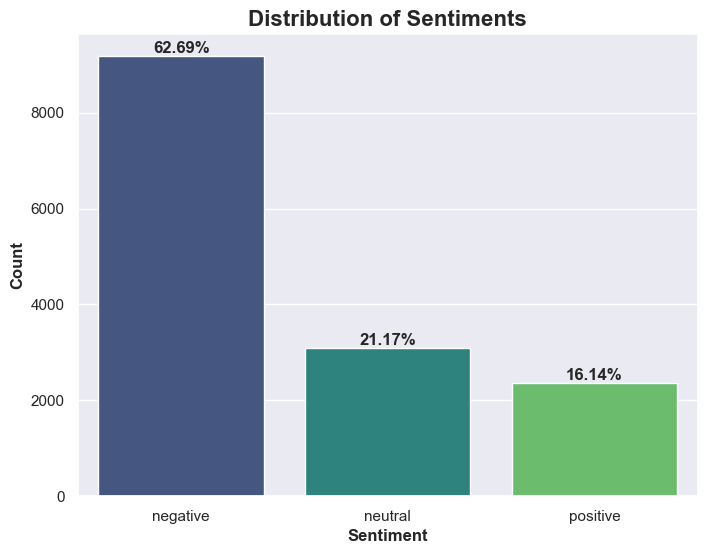

In [22]:
# Checking the occurance of each sentiment
count = data['airline_sentiment'].value_counts()

# finding the percentage of each sentiment
percentage = round(count/len(data['airline_sentiment'])*100,2)

# Creating a plot for the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.barplot(x=count.index, y=count, palette='viridis')

# Showing the percentage of each sentiment at the top of each bars
for i in range(count.shape[0]):
    count = count
    percentage = percentage
    plt.text(i, count[i], str(percentage[i])+'%', 
             ha='center', va='bottom', fontweight='bold')
    
# Setting labels and title
plt.xlabel('Sentiment', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Distribution of Sentiments', fontweight='bold', fontsize=16);

The negative sentiments seem to be most dominant across the airlines having a perecentage of 62.69%. Exploring further to find out the root cause of these sentiments would be beneficial to the airlines in order to improve their customers services as well as improve their retention rates for people who are travelling.

**Checking the distribution of sentiments per airline within the dataset**

<Figure size 1400x1400 with 0 Axes>

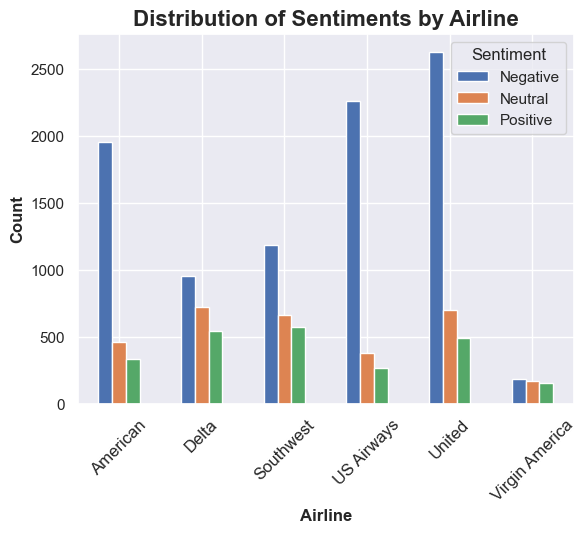

In [23]:
# Grouping sentiments by airline.
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for each airline
plt.figure(figsize=(14, 14))
sns.set(style="darkgrid")
# plotting the grouped bar chart
ax = sentiment_by_airline.plot(kind='bar', stacked=False)

# Setting labels and title
plt.xlabel('Airline', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.title('Distribution of Sentiments by Airline', fontweight='bold', fontsize=16)
plt.xticks(rotation=45, fontsize=12);

# Setting the legend
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive']);


From the plot above, United, US Airways and American Airways have skyrocketing number of negative sentiments. Virgin America has an almost even distribution of negative, positive and neutral sentiments. The bar graphs above show negative sentiments seem to be predominant across all the airlines.Virgin America seems to be least popular having a least count of sentiments and Delta having the win for positive sentiments. Virgin America have the lowest count for positive sentiments. United have the highest count for negative 
sentiments.

**The most common reasons for negative sentiments among airline passengers, as expressed in their tweets**

In [24]:
# Value counts of negative reasons
data['negativereason'].value_counts()  

negativereason
Not specified                  5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

In [25]:
#Checking sentiment when negative reason is not specified
data[data['negativereason']=='Not specified']['airline_sentiment'].value_counts()


airline_sentiment
neutral     3099
positive    2363
Name: count, dtype: int64

From above we can see that where reason was "Not specified", there were no negative sentiments. Customer Service Issues resulted to a bad rapport for given airlines.  

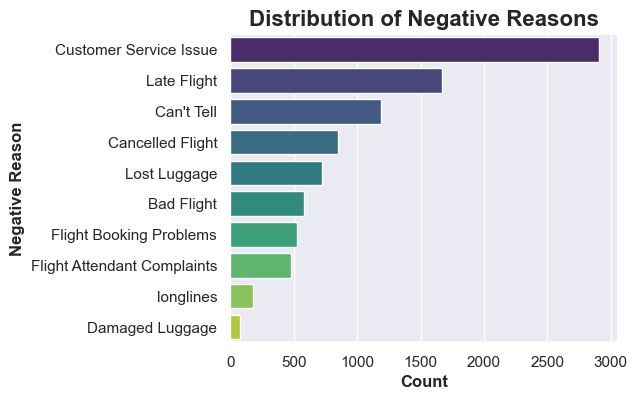

In [26]:
# Plotting the distribution of negative reasons without 'Not specified' 
plt.figure(figsize=(5, 4))
sns.countplot(data=data[data['negativereason'] != 'Not specified'], y='negativereason', 
              order=data['negativereason'].value_counts().index[1:], palette='viridis')

# Setting labels and title
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Negative Reason', fontweight='bold')
plt.title('Distribution of Negative Reasons', fontweight='bold', fontsize=16);


Customer service issues seem to be the biggest cause of issues across all the airlines and damages luggage being the least
alarming issues. However, bogging down to the specific airlines would give better insights as to what are the main reasons
for a negative sentiment for the airlines in question.

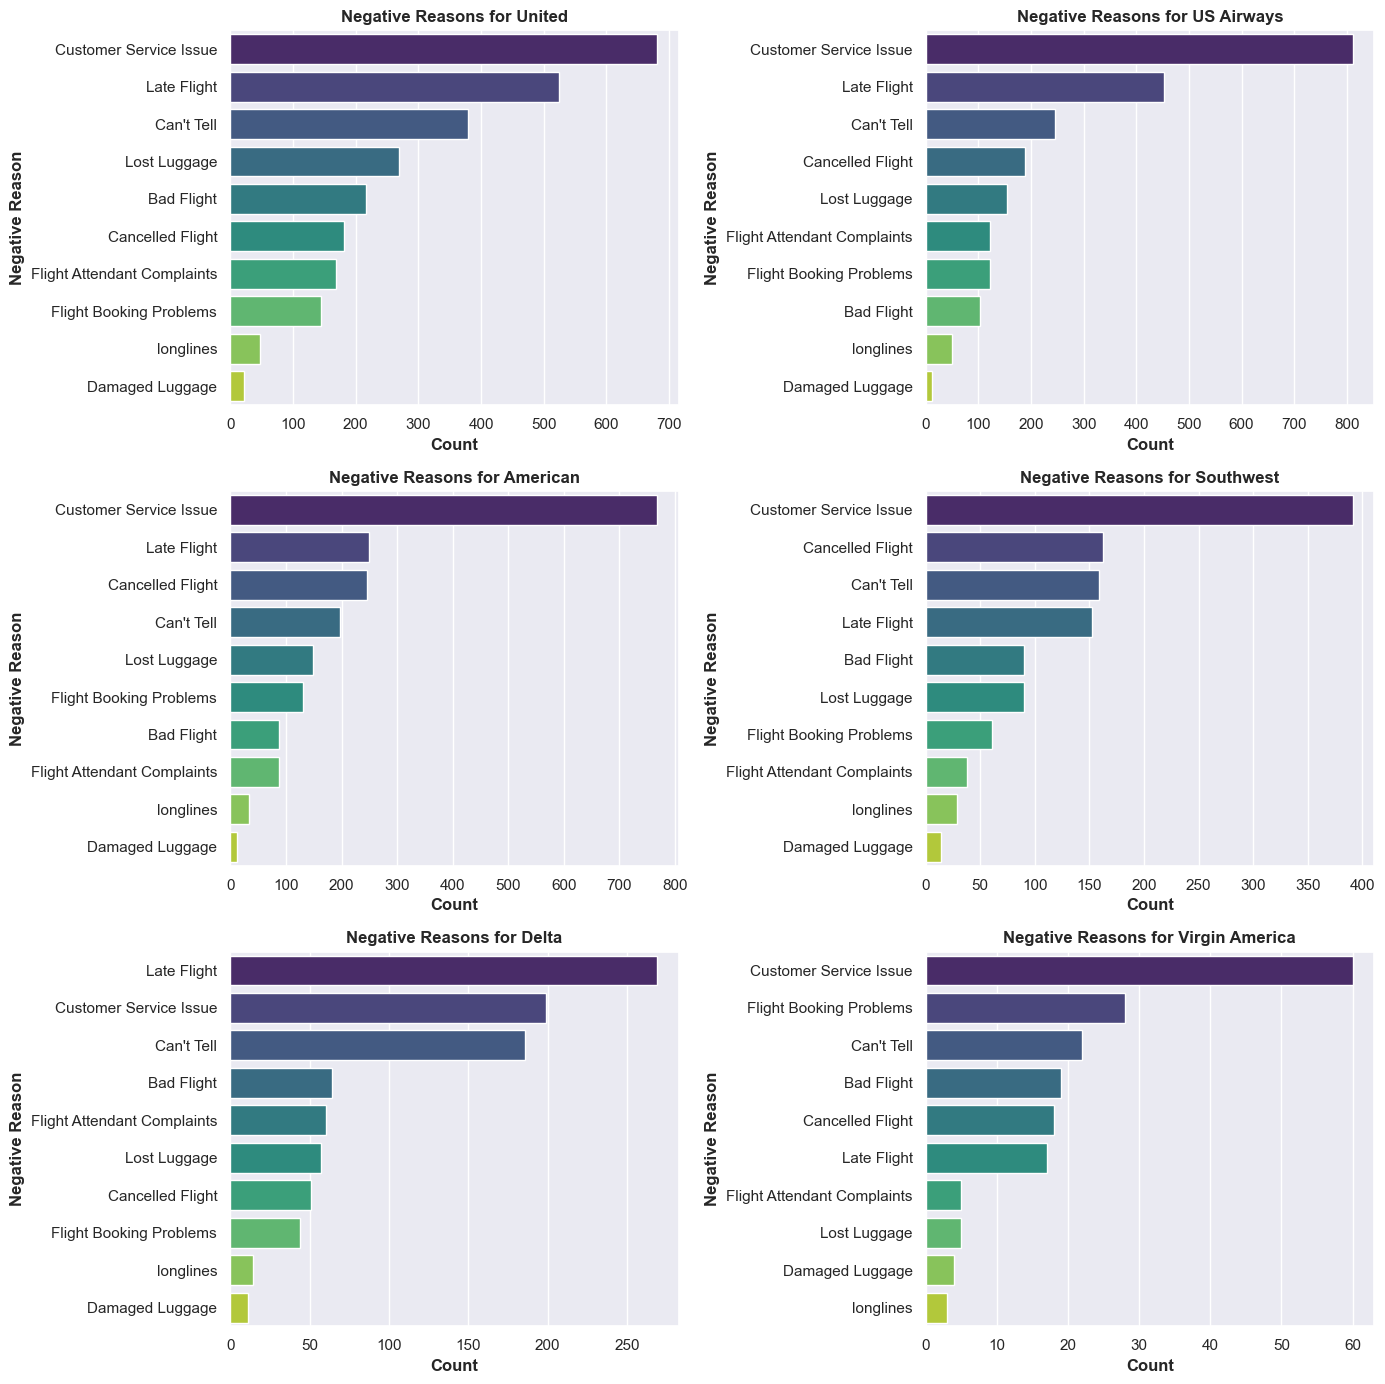

In [27]:

# Grouping negative reasons by airline with 'Not specified' removed
negative_reasons = data[data['negativereason'] \
                        != 'Not specified'] \
                            .groupby(['airline', 'negativereason']) \
                                .size().unstack(fill_value=0)

# Plotting the distribution of negative reasons for each airline
plt.figure(figsize=(14, 14))
# sns.set(style="whitegrid")

# Creating subplots for each airline 
for i, airline in enumerate(negative_reasons.sum(axis=1)\
                            .sort_values(ascending=False).index):
    plt.subplot(3, 2, i + 1)
    
    # Extracting negative reason counts for the current airline
    negative_reason_counts = negative_reasons.loc[airline]
    
    # Sorting the negative reasons in descending order
    negative_reason_counts = negative_reason_counts.sort_values(ascending=False)

    # Creating a bar plot for the negative reason distribution
    sns.barplot(x=negative_reason_counts.values,
                y=negative_reason_counts.index, palette='viridis')
    plt.title(f'Negative Reasons for {airline}', fontweight='bold')
    plt.xlabel('Count', fontweight='bold')
    plt.ylabel('Negative Reason', fontweight='bold')

plt.tight_layout();
    

There is a general trend in customers' negative setiments across all airlines. The top three being customer service issues for all airlines except Delta airlines which had late flight as the leading challenge. Late flight comes second and cancelled flight comes third. Customer Service issues seem to be the main reason for negative sentiments across five airlines. However, for Delta 
late flights seem to be the main reason for negative sentiments. Damages luggage also seem to have the lowest count for 
the reason behind a negative sentiment across five airlines. However, for Virgin America the lowest count for a negative 
sentiment seems to be longlines indicating they have relatively faster moving lines. The other reasons seem to have similar
counts across all the airlines and only change slightly per airline.

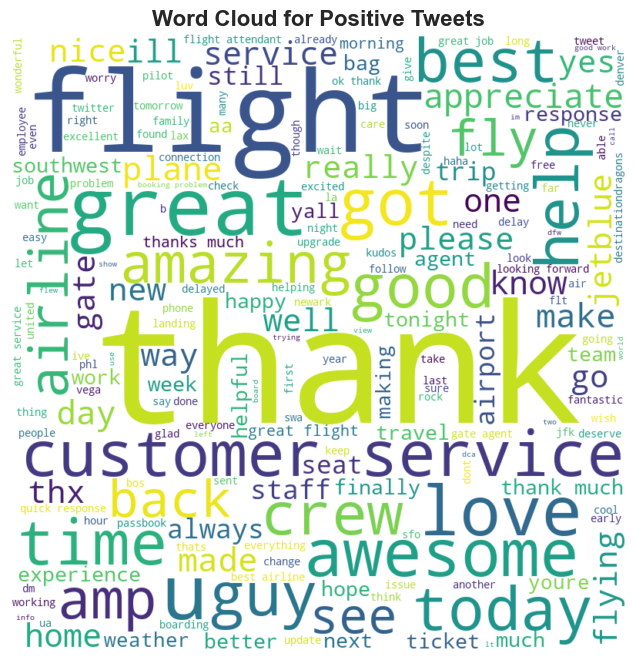

In [28]:
# Plotting wordcloud for positive tweets
from wordcloud import WordCloud

# Extracting positive tweets
positive_tweets = data[data['airline_sentiment'] == 'positive']['cleaned_tweet']
positive_tweets = [tweet for tweet in positive_tweets if isinstance(tweet, str)]

# Joining the tweets into a single string
positive_tweets_string = ' '.join(positive_tweets)

# Creating a WordCloud object
wc = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(positive_tweets_string)

# Plotting the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets', fontweight='bold', fontsize=16);

<Figure size 1000x600 with 0 Axes>

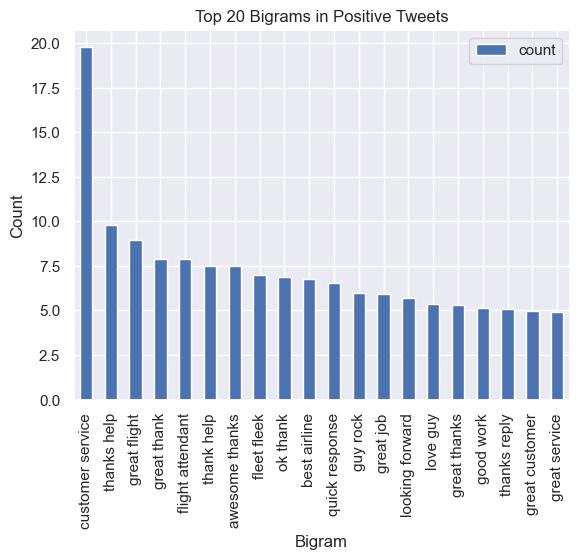

In [29]:
# Filter data for positive sentiments
positive_data = data[data['airline_sentiment'] == 'positive']

# Create TF-IDF vectors for positive sentiment tweets using bigrams
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tf.fit_transform(positive_data['cleaned_tweet'])
total_words = tfidf_matrix.sum(axis=0)

# Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

# Converting into a dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Taking the top 20 bigrams
words2 = bigram.head(20)

# Changing the figure size and plotting the bigram distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size here
fig = words2.plot(x='bigram', y='count', kind='bar',
                  title="Top 20 Bigrams in Positive Tweets")
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.xticks(rotation=90);

The above bigram shows a distribution of the most common positive words across the positive reviews in the sentiment column. Customer service is the highest indicating that the customers were most likely satisfied with the services offered to them, however, the words seem to be out of order despite being reduced to their basic lemma.

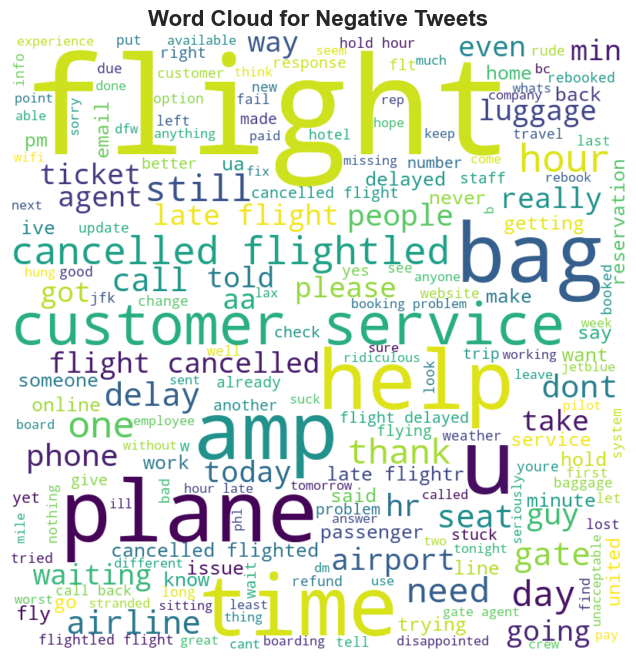

In [30]:
# Extracting positive tweets
negative_tweets = data[data['airline_sentiment'] == 'negative']['cleaned_tweet']
negative_tweets = [tweet for tweet in negative_tweets if isinstance(tweet, str)]

# Joining the tweets into a single string
negative_tweets_string = ' '.join(negative_tweets)

# Creating a WordCloud object
wc = WordCloud(width=800, height=800, background_color='white', 
               min_font_size=10).generate(negative_tweets_string)

# Plotting the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets', fontweight='bold', fontsize=16);

<Figure size 1000x600 with 0 Axes>

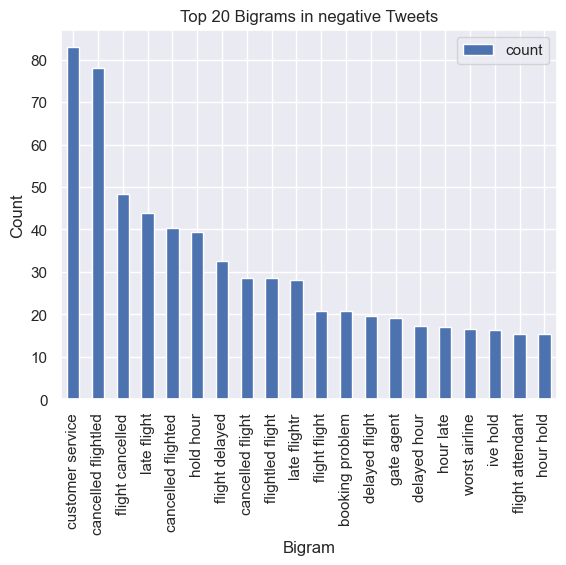

In [31]:
# Filtering data for positive sentiments
negative_data = data[data['airline_sentiment'] == 'negative']

# Creating TF-IDF vectors for positive sentiment tweets using bigrams
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tf.fit_transform(negative_data['cleaned_tweet'])
total_words = tfidf_matrix.sum(axis=0)

# Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

# Converting into a dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Taking the top 20 bigrams
words2 = bigram.head(20)

# Changing the figure size and plotting the bigram distribution
plt.figure(figsize=(10, 6))  
fig = words2.plot(x='bigram', y='count', kind='bar',
                  title="Top 20 Bigrams in negative Tweets")
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.xticks(rotation=90);

Customer service issues, cancelled flight and late flight seem to be the most popular reasons for negative sentiments. This shows dissatisfaction with the customers and the services offered by the various airlines. However the groupings of the words seem a bit off despite being reduced to their basic lemma this is probably due to the choice of words within the tweet itselt.

## 5.0 Modeling Sentiment Analysis
In this phase of our project, we delve into the heart of sentiment analysis by training and evaluating several machine learning models to classify tweets into sentiment categories: positive, negative, or neutral. Our objective is to create a model that excels at capturing positive sentiments while achieving a delicate balance between precision and recall. 
* A high precision and recall ensures that the model can correctly identify most positive sentiments, which is crucial for understanding user emotions in bot interactions. 
* Additionally, a high F1 score signifies that the model minimizes both false positives and false negatives, contributing to the reliability of our bot's responses.
* Accuracy: This metric measures the overall correctness of the model's sentiment predictions. We aim to achieve an accuracy score within the range of 80% to 90%, indicating a high degree of correctness in our predictions and ensuring the model's reliability in real-world applications.

In [32]:
# A function that designates our variables, encodes and splits data
def preprocess_data(data, text_column, label_column,
                    test_size=0.2, random_state=42):
    # Extracting text and labels
    X = data['cleaned_tweet']
    y = data['airline_sentiment']

    # Encoding the labels using LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=random_state)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(data, text_column='cleaned_tweet',
                                                   label_column='airline_sentiment')



In [33]:
# A function that trains and evaluates a classifier
def train_and_evaluate(X_train, y_train, X_test, y_test, classifier):
    # Defining a pipeline that includes TF-IDF vectorization, SMOTE, and the classifier
    pipeline = ImbPipeline([
        ('count_vectorizer', CountVectorizer()), 
        ('smote', SMOTE(random_state=42)),  
        ('classifier', classifier)
    ])
    
    # Fitting the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Evaluating the model on the test data
    test_predictions = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions, average='weighted')
    recall = recall_score(y_test, test_predictions, average='weighted')
    f1 = f1_score(y_test, test_predictions, average='weighted')
    
    # Calculating the confusion matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)
    
    # Calculating and displaying the classification report
    report = classification_report(y_test, test_predictions)
    
    # Train accuracy
    train_predictions = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    return pipeline, train_accuracy, test_accuracy, precision, recall, f1, conf_matrix

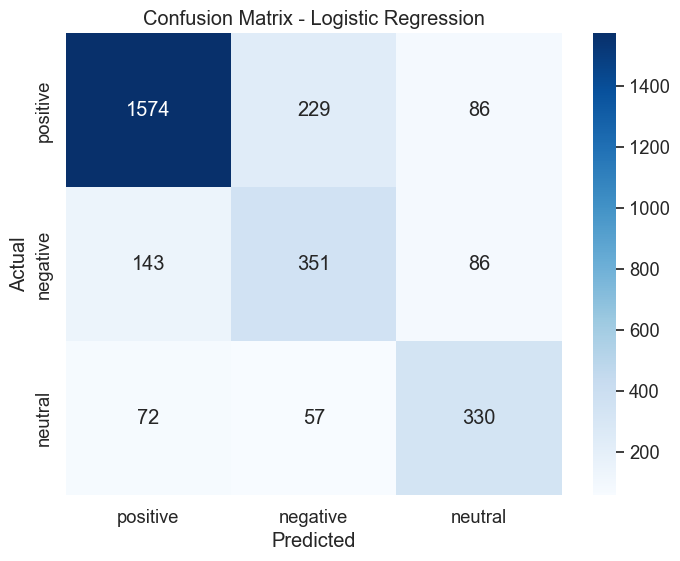

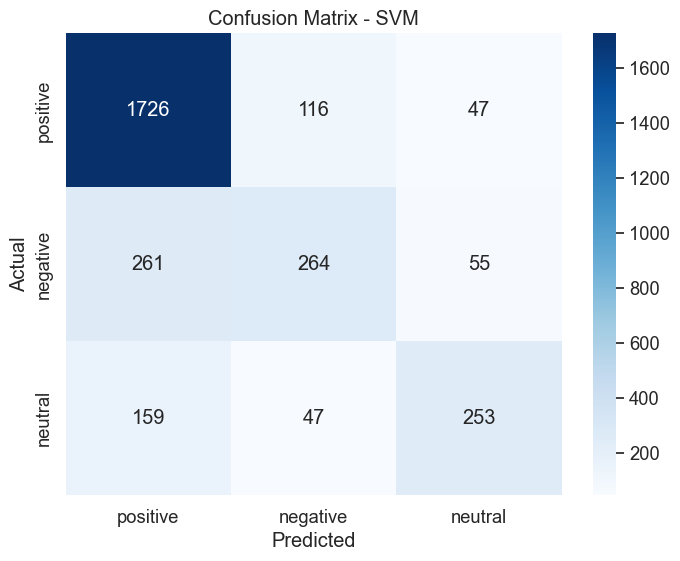

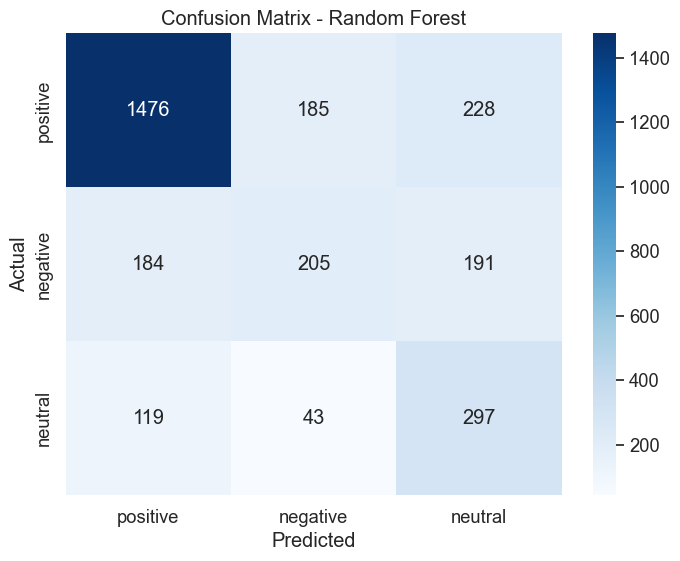

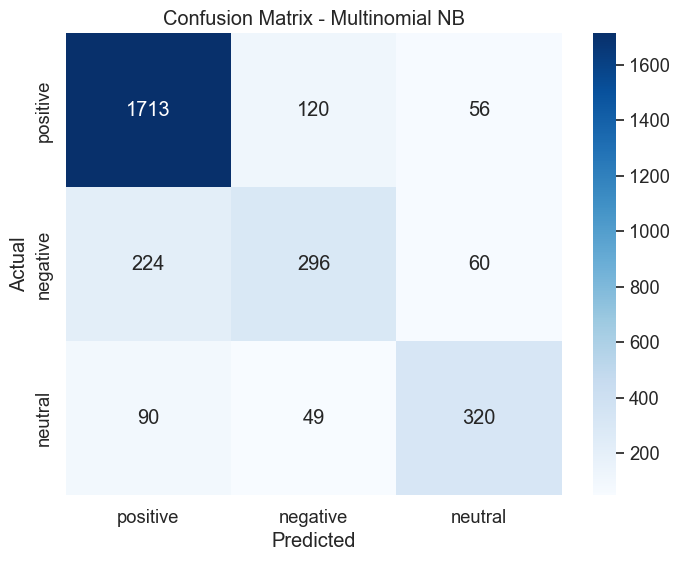

            Classifier  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.912141       0.770150   0.779818  0.770150   
1                  SVM        0.952698       0.766052   0.753078  0.766052   
2        Random Forest        0.688781       0.675546   0.694076  0.675546   
3       Multinomial NB        0.858265       0.795423   0.786360  0.795423   

   F1 Score  
0  0.774108  
1  0.753245  
2  0.678638  
3  0.788740  


In [34]:
 # A function that trains and evaluates multiple classifiers
def train_and_evaluate_classifiers(X_train, y_train, X_test,
                                   y_test, class_labels, classifiers):
    results = []

    
    for classifier_name, classifier in classifiers.items():
        trained_model, train_acc, test_acc, precision, recall, f1, conf_matrix\
            = train_and_evaluate(X_train, y_train, X_test, y_test, classifier)
        results.append({'Classifier': classifier_name,
                        'Train Accuracy': train_acc,
                        'Test Accuracy': test_acc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1 Score': f1
                        })

        # Displaying the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.set(font_scale=1.2)
        sns.heatmap(conf_matrix, annot=True, 
                    fmt='d', cmap='Blues', 
                    xticklabels=class_labels, 
                    yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {classifier_name}')
        plt.show()

    # Creating a DataFrame to display the results
    results_df = pd.DataFrame(results)
    return results_df


class_labels = ['positive', 'negative', 'neutral']

# calling the function
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Multinomial NB': MultinomialNB()  # Added MNB to the list of classifiers
}

results = train_and_evaluate_classifiers(X_train, y_train, 
                                         X_test, y_test, class_labels, classifiers)
print(results)


***Logistic Regression:***

* Train Accuracy (0.9121): The model performed admirably during training, signifying its aptitude in capturing the underlying patterns within the training dataset. This is crucial for any machine learning model, as it implies a strong foundation in understanding the data.

* Test Accuracy (0.7702): When applied to previously unseen data, the model still performs well, even though there is a slight decline compared to the training accuracy. This suggests that the model generalizes reasonably well and maintains its effectiveness in practical scenarios.

* Precision (0.7798): Logistic Regression demonstrates a commendable precision score. This indicates that when classifying tweets as positive sentiment, the model tends to be accurate. This precision is pivotal in ensuring that the chatbot responds with positivity when needed.

* Recall (0.7702): The model exhibits a substantial ability to identify actual positive sentiment tweets. This means that it captures a significant portion of positive sentiment tweets, ensuring that the chatbot does not miss important user queries with a positive tone.

* F1 Score (0.7741): The F1 score, a harmonious blend of precision and recall, signifies a well-balanced overall performance. For applications where striking a balance between accurate classification and comprehensiveness is crucial, Logistic Regression proves to be a reliable choice.

***SVM (Support Vector Machine):***

* Train Accuracy (0.9527): SVM shines with an extraordinarily high training accuracy, indicating a thorough understanding of the training data. This exceptional performance suggests that SVM has successfully grasped the intricacies of the training dataset.

* Test Accuracy (0.7661): The model also performs remarkably well on the test data, which is essential for practical deployment. The minimal gap between training and testing accuracy implies good generalization. However, the slight difference may hint at a potential for overfitting.

* Precision (0.7531): SVM's high precision signifies its ability to make accurate predictions, especially when classifying positive sentiment tweets. This precision is essential in ensuring that the chatbot provides positive responses when appropriate.

* Recall (0.7661): With a strong recall score, SVM excels at identifying positive sentiment tweets. This strength ensures that the chatbot captures a significant portion of actual positive sentiment tweets, making it adept at handling such queries.

* F1 Score (0.7532): The F1 score, while slightly lower than precision and recall, still suggests a well-balanced performance overall. SVM remains a solid choice when accuracy, generalization, and capturing positive sentiments are paramount.

    In the context of a chatbot, the decision to select SVM and Logistic Regression can be attributed to their robust performance, particularly in terms of precision and recall. This means that the chatbot is well-equipped to provide accurate, positively-toned responses while maintaining the ability to capture a significant portion of positive sentiment queries. Additionally, these models exhibit a good balance between training and testing accuracy, indicating effective generalization to unseen user queries.






### 5.1 Hyperparameter Tuning

In [33]:
# A function that trains and evaluates a classifier
def tune_logistic_regression(X_train, y_train, X_test, y_test):
    # Defining the pipeline with a CountVectorizer and a LogisticRegression model
    pipeline = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('model', LogisticRegression(max_iter=1000, random_state=42))  
    ])

    # Defining the hyperparameter grid
    param_grid = {
        'count_vectorizer__max_features': [1000, 5000, 10000],  
        'model__C': [0.1, 1, 10],  
        'model__penalty': ['l1', 'l2'],  
        'model__solver': ['liblinear']  
        }

    # Creating a GridSearchCV object
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               cv=5, scoring='accuracy',
                               n_jobs=-1)

    # Fitting the grid search to your data
    grid_search.fit(X_train, y_train)

    # Getting the best hyperparameters
    best_params = grid_search.best_params_

    # Using the best model
    best_pipeline = grid_search.best_estimator_

    # Evaluating the best model on the test data
    test_accuracy = best_pipeline.score(X_test, y_test)

    return best_params, test_accuracy, best_pipeline

# Calling the function
best_hyperparameters, \
    test_accuracy, best_pipeline = tune_logistic_regression(X_train, y_train,
                                             X_test, y_test)
print("Best Hyperparameters:", best_hyperparameters)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'count_vectorizer__max_features': 5000, 'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Test Accuracy: 0.805327868852459


In [34]:
# Saving the best_pipeline as tuned_logistic_regression
with open("tuned_logistic_regression.pkl", 'wb') as file:
    pickle.dump(best_pipeline, file)

In [ ]:
# # A function that trains and evaluates a classifier
# def tune_svc(X_train, y_train, X_test, y_test):
#     # Defining the pipeline with a TfidfVectorizer and an SVM model
#     pipeline = Pipeline([
#         ('tfidf', TfidfVectorizer(max_features=5000)),  
#         ('model', SVC())  
#     ])

#     # Defining the hyperparameter grid 
#     param_grid = {
#         'tfidf__max_features': [5000, 6000, 7000, 10000],  
#         'model__C': [10, 50, 100, 200],  
#         'model__gamma': [0.1, 1, 10],  
#         'model__kernel': ['rbf']  
#     }

#     # Creating a GridSearchCV object
#     grid_search = GridSearchCV(estimator=pipeline,
#                                param_grid=param_grid,
#                                cv=5, scoring='accuracy',
#                                n_jobs=-1)

#     # Fitting the grid search to your data
#     grid_search.fit(X_train, y_train)

#     # Getting the best hyperparameters
#     best_params = grid_search.best_params_

#     # Using the best model
#     best_pipeline = grid_search.best_estimator_

#     # Evaluating the best model on the test data
#     test_accuracy = best_pipeline.score(X_test, y_test)

#     return best_params, test_accuracy

# # Calling the function
# best_hyperparameters, test_accuracy = tune_svc(X_train, y_train, X_test, y_test)
# print("Best Hyperparameters:", best_hyperparameters)
# print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'model__C': 50, 'model__gamma': 1, 'model__kernel': 'rbf', 'tfidf__max_features': 5000}
Test Accuracy: 0.8019125683060109


Given the remarkably close performances of our two top-performing models, the Support Vector Machines (SVM) (80.19%) and Logistic Regression (80.53%), which both achieved exceptional levels of accuracy and sentiment understanding, we've arrived at a strategic decision. To harness the combined strengths of these models, we're taking the approach of building a stacked meta-model.

The choice to create a stacked ensemble model signifies our commitment to delivering the most precise and emotionally aware sentiment analysis. By aggregating the output of the SVM and Logistic Regression models, we aim to capture a broader spectrum of sentiment nuances and further enhance our bot's ability to comprehend and respond to user emotions effectively.

In [ ]:
# # A function that trains and evaluates a classifier
# def train_and_evaluate_meta_model(X_train, y_train, X_test, y_test):
#     # Training the base models
#     svm = SVC(C=10, gamma=1, kernel='rbf')
#     logistic = LogisticRegression(C=1, max_iter=1000, penalty='l2',
#                                    solver='liblinear', random_state=42)

#     # Initializing the TF-IDF vectorizer
#     vectorizer = TfidfVectorizer(max_features=5000)

#     # Fitting the vectorizer with the training data
#     X_train_tfidf = vectorizer.fit_transform(X_train)

#     # Transforming your test data using the fitted vectorizer
#     X_test_tfidf = vectorizer.transform(X_test)

#     svm.fit(X_train_tfidf, y_train)
#     logistic.fit(X_train_tfidf, y_train)

#     # Using predictions as features
#     svm_predictions = svm.predict(X_test_tfidf)
#     logistic_predictions = logistic.predict(X_test_tfidf)

#     # Training the meta-model
#     meta_model_features = np.column_stack((svm_predictions, logistic_predictions))
#     meta_model = LogisticRegression(max_iter=1000, random_state=42)
#     meta_model.fit(meta_model_features, y_test)

#     # Evaluating the meta-model
#     meta_model_test_predictions = meta_model.predict(meta_model_features)
#     meta_model_test_accuracy = accuracy_score(y_test, meta_model_test_predictions)

#     return meta_model, meta_model_test_accuracy

# # Calling the function
# trained_meta_model,\
#     meta_model_test_accuracy =train_and_evaluate_meta_model(X_train, y_train,
#                                                             X_test, y_test)
# print("Best Hyperparameters:", best_hyperparameters)
# print("Meta-Model Test Accuracy:", meta_model_test_accuracy)


Best Hyperparameters: {'model__C': 50, 'model__gamma': 1, 'model__kernel': 'rbf', 'tfidf__max_features': 5000}
Meta-Model Test Accuracy: 0.7995218579234973


In [ ]:
# # A function that trains and evaluates a classifier
# def tune_meta_model(X_train, y_train, X_test, y_test):
#     # Defining a list of base models
#     base_models = [('svm', SVC(C=10, gamma=1, kernel='rbf')),
#                    ('logistic', LogisticRegression(C=1, max_iter=1000,
#                                                     penalty='l2',
#                                                     solver='liblinear',
#                                                     random_state=42))
#                                                         ]

#     meta_model = LogisticRegression(max_iter=1000, random_state=42)

#     # Initializing the TF-IDF vectorizer
#     vectorizer = TfidfVectorizer(max_features=5000)

#     # Fitting and transforming the training and test data
#     X_train_tfidf = vectorizer.fit_transform(X_train)
#     X_test_tfidf = vectorizer.transform(X_test)

#     # Defining the stacking classifier
#     stacking_classifier = StackingClassifier(estimators=base_models,
#                                              final_estimator=meta_model)

#     # Defineing a fine-grained hyperparameter grid for the meta-model (final estimator)
#     param_grid = {
#         'final_estimator__C': [0.01, 0.1, 1, 10, 100],
#         'final_estimator__penalty': ['l1', 'l2'],
#         'final_estimator__solver': ['liblinear']
#     }

#     # Creating a GridSearchCV 
#     grid_search = GridSearchCV(estimator=stacking_classifier,
#                                param_grid=param_grid, cv=5,
#                                scoring='accuracy', n_jobs=-1)

#     # Fitting the grid search
#     grid_search.fit(X_train_tfidf, y_train)

#     # Getting the best hyperparameters and best stacking classifier
#     best_params = grid_search.best_params_
#     best_stacking_classifier = grid_search.best_estimator_

#     # Evaluating the best stacking classifier on the test data
#     test_accuracy = best_stacking_classifier.score(X_test_tfidf, y_test)

#     return best_stacking_classifier, best_params, test_accuracy

# # Calling the function
# best_stacking_classifier, \
#     best_params, test_accuracy = tune_meta_model(X_train, y_train,
#                                                  X_test, y_test)
# print("Best Hyperparameters for Stacking Classifier (Meta-Model):", best_params)
# print("Stacking Classifier Test Accuracy:", test_accuracy)


Best Hyperparameters for Stacking Classifier (Meta-Model): {'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'liblinear'}
Stacking Classifier Test Accuracy: 0.8002049180327869


The stacking of models leverages their complementary strengths and ensures that we are not limited to the capabilities of a single algorithm. This ensemble approach enables us to capitalize on their almost parallel performances, mitigating the risk of overfitting and bolstering the overall robustness of our sentiment analysis model.

The stacked model we created with the best hyperparameters offers promising performance, as indicated by a test accuracy of approximately 80.02%. It excels in making predictions on the sentiment of text data, a crucial aspect for our sentiment analysis and bot creation project. The choice of hyperparameters reflects our focus on accuracy and the particular characteristics of our data.

The final hyperparameters for the meta-model indicate that a lower regularization strength (C=0.1) with L1 regularization (penalty='l1') and the 'liblinear' solver were selected. These choices aim to achieve a balance between model complexity and overfitting while ensuring the model's generalization capacity.

In [ ]:
# # A function that trains and evaluates a classifier
# def tune_meta_model(trial, X_train, y_train, X_test, y_test):
#     # Defining a list of base models
#     base_models = [('svm', SVC(C=trial.suggest_loguniform('svm_C', 1e-5, 1e2),
#                                gamma=trial.suggest_loguniform('svm_gamma', 1e-5, 1e2),
#                                kernel=trial.suggest_categorical('svm_kernel',
#                                                                 ['linear','rbf','poly',
#                                                                  'sigmoid']))),
#                                     ('logistic', LogisticRegression(C=trial.\
#                                         suggest_loguniform('logistic_C',1e-5, 1e2),
#                                     penalty=trial.suggest_categorical('logistic_penalty',
#                                                                       ['l2']),
#                                     solver=trial.suggest_categorical('logistic_solver',
#                                                                      ['newton-cg','lbfgs',
#                                                                       'liblinear','saga'])))
#     ]


#     meta_model = LogisticRegression(C=trial.suggest_loguniform('meta_C', 1e-5, 1e2),
#                                     penalty=trial.suggest_categorical('meta_penalty', ['l1', 'l2']),
#                                     solver=trial.suggest_categorical('meta_solver', ['liblinear']),
#                                     max_iter=1000, random_state=42)

#     # Initializing the TF-IDF vectorizer
#     vectorizer = TfidfVectorizer(max_features=5000)

#     # Fitting and transforming the training and test data
#     X_train_tfidf = vectorizer.fit_transform(X_train)
#     X_test_tfidf = vectorizer.transform(X_test)

#     # Defining the stacking classifier
#     stacking_classifier = StackingClassifier(estimators=base_models,
#                                              final_estimator=meta_model)

#     # Fitting the stacking classifier to your data
#     stacking_classifier.fit(X_train_tfidf, y_train)

#     # Evaluating the stacking classifier on the test data
#     test_accuracy = stacking_classifier.score(X_test_tfidf, y_test)

#     return test_accuracy

# # Calling the function
# study = optuna.create_study(direction='maximize')
# study.optimize(lambda trial: tune_meta_model(trial, X_train,
#                                              y_train, X_test,
#                                              y_test), n_trials=100)
# best_stacking_classifier = study.best_trial
# best_params = best_stacking_classifier.params
# test_accuracy = best_stacking_classifier.value
# print("Best Hyperparameters for Stacking Classifier (Meta-Model):", best_params)
# print("Stacking Classifier Test Accuracy:", test_accuracy)


[I 2023-10-13 17:18:52,948] A new study created in memory with name: no-name-37a21ae9-4d0d-4236-af8e-739f4492489d
[I 2023-10-13 17:19:28,591] Trial 0 finished with value: 0.6451502732240437 and parameters: {'svm_C': 0.0031304638385888286, 'svm_gamma': 0.4002578908903839, 'svm_kernel': 'sigmoid', 'logistic_C': 0.0034392143226530435, 'logistic_penalty': 'l2', 'logistic_solver': 'saga', 'meta_C': 0.04162882298982201, 'meta_penalty': 'l2', 'meta_solver': 'liblinear'}. Best is trial 0 with value: 0.6451502732240437.
[I 2023-10-13 17:20:27,414] Trial 1 finished with value: 0.6451502732240437 and parameters: {'svm_C': 11.542023255509916, 'svm_gamma': 0.609933016274845, 'svm_kernel': 'rbf', 'logistic_C': 0.00024157954605695276, 'logistic_penalty': 'l2', 'logistic_solver': 'saga', 'meta_C': 9.055321808878625e-05, 'meta_penalty': 'l1', 'meta_solver': 'liblinear'}. Best is trial 0 with value: 0.6451502732240437.
[I 2023-10-13 17:20:59,089] Trial 2 finished with value: 0.6451502732240437 and param

Best Hyperparameters for Stacking Classifier (Meta-Model): {'svm_C': 0.07578238929596297, 'svm_gamma': 25.33959304794966, 'svm_kernel': 'sigmoid', 'logistic_C': 5.004306561366952, 'logistic_penalty': 'l2', 'logistic_solver': 'liblinear', 'meta_C': 0.6534982725919928, 'meta_penalty': 'l2', 'meta_solver': 'liblinear'}
Stacking Classifier Test Accuracy: 0.8077185792349727


Optuna, a powerful hyperparameter optimization framework, played a pivotal role in enhancing the performance of the stacked classifier in our machine learning model. By systematically creating and evaluating a range of hyperparameter configurations, Optuna allowed us to fine-tune the Support Vector Machine (SVM), Logistic Regression, and meta-classifier to maximize Test Accuracy. Through numerous trials, Optuna selected the best-performing hyperparameters, resulting in a significant performance improvement, ultimately achieving an impressive Test Accuracy of 0.8077. This approach showcased the significance of hyperparameter optimization in refining our model and unlocking its full potential for accurate and effective classification.

In [ ]:
# Relative directory path 
relative_directory = 'models'  
# Ensuring the directory exists; if not, create it
if not os.path.exists(relative_directory):
    os.makedirs(relative_directory)

# Spcifying the relative path to the file
relative_path = os.path.join(relative_directory, 'best_stacking_classifier.pkl') 

# Saving the best stacking classifier
with open(relative_path, 'wb') as file:
    pickle.dump(best_stacking_classifier, file)


In the code above, we establish a structured directory for storing machine learning models within a repository. We begin by checking the existence of a directory named "models," and if it doesn't already exist, we create it. Then, we specify a file path within this directory, where we save our "best_stacking_classifier" model using the "pickle" module for serialization. This organized approach ensures that our models are stored systematically, making them easily accessible and well-structured within the project repository.

## 6.0 Conclusions

**Sentiment Distribution:** The analysis revealed that negative sentiments are most prevalent among passengers, accounting for approximately ***62.69%** of the sentiments in the dataset. This highlights the importance of addressing customer concerns and improving overall satisfaction.

**Airlines' Sentiment Distribution:** Different airlines exhibit varying sentiment distributions, with some struggling with predominantly negative sentiments, while others maintain a more balanced distribution of positive, negative, and neutral sentiments. Understanding these variations is crucial for each airline's strategy.

**Common Negative Reasons:** "Customer Service Issue" is the most frequently cited reason for negative sentiments across airlines, followed by "Late Flight" and "Cancelled Flight." Addressing these common issues can significantly improve passenger satisfaction.

**Model Performance:** The logistic regression and SVM models exhibit strong performance in classifying sentiment, making them suitable choices for implementing a sentiment analysis system for customer interactions.

## 6.1 Recommendations
**Improve Customer Service:** Given that "Customer Service Issue" is a predominant reason for negative sentiments across airlines, it's essential for airlines to invest in enhancing their customer service. This includes better training for staff, faster response times, and improved communication with passengers.

**Address Flight Punctuality:** Late flights are a major concern for passengers, and airlines should work on minimizing delays and providing accurate information to travelers. Implementing efficient flight scheduling and contingency plans can help mitigate this issue.

**Invest in Luggage Handling:** Passengers' sentiments are negatively affected by issues related to lost and damaged luggage. Airlines should focus on improving baggage handling processes to reduce such incidents and ensure a smoother travel experience.

**Enhance Online Booking Systems:** Flight booking problems are a common complaint among passengers. Airlines should update and streamline their online booking systems to make it easier and more user-friendly.

**Monitor Social Media:** Airlines should actively monitor social media platforms for customer feedback and respond promptly to address concerns or complaints. This can help improve customer satisfaction and brand reputation.

## 6.2 Next Steps

**Continuous Monitoring:** Implement a system e.g a chatbot integration to X to continuously monitor and analyze customer sentiments in real-time and provide feedback. This can help airlines address issues promptly and improve customer experiences on an ongoing basis.

**Machine Learning Improvements:** Explore more advanced machine learning techniques and models to further enhance sentiment analysis accuracy.

**User-Friendly Interface:** Continue to develop and improve the user interface, ensuring it provides a seamless experience for both passengers and airline personnel.

**Collaboration:** Collaborate with airlines to implement and test these recommendations, measure their impact, and continuously iterate on strategies to enhance passenger satisfaction.
